In [239]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score

## Introduction and data injestion + EDA

In [240]:
df = pd.read_csv("WestRoxbury.csv")
df

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,Recent
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,NaN
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,NaN
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,NaN


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5802 entries, 0 to 5801
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TOTAL VALUE   5802 non-null   float64
 1   TAX           5802 non-null   int64  
 2   LOT SQFT      5802 non-null   int64  
 3   YR BUILT      5802 non-null   int64  
 4   GROSS AREA    5802 non-null   int64  
 5   LIVING AREA   5802 non-null   int64  
 6   FLOORS        5802 non-null   float64
 7   ROOMS         5802 non-null   int64  
 8   BEDROOMS      5802 non-null   int64  
 9   FULL BATH     5802 non-null   int64  
 10  HALF BATH     5802 non-null   int64  
 11  KITCHEN       5802 non-null   int64  
 12  FIREPLACE     5802 non-null   int64  
 13  REMODEL       1456 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 634.7+ KB


In [242]:
df["REMODEL"].unique() #missing values and is qualatative

array([nan, 'Recent', 'Old'], dtype=object)

In [243]:
df.describe()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


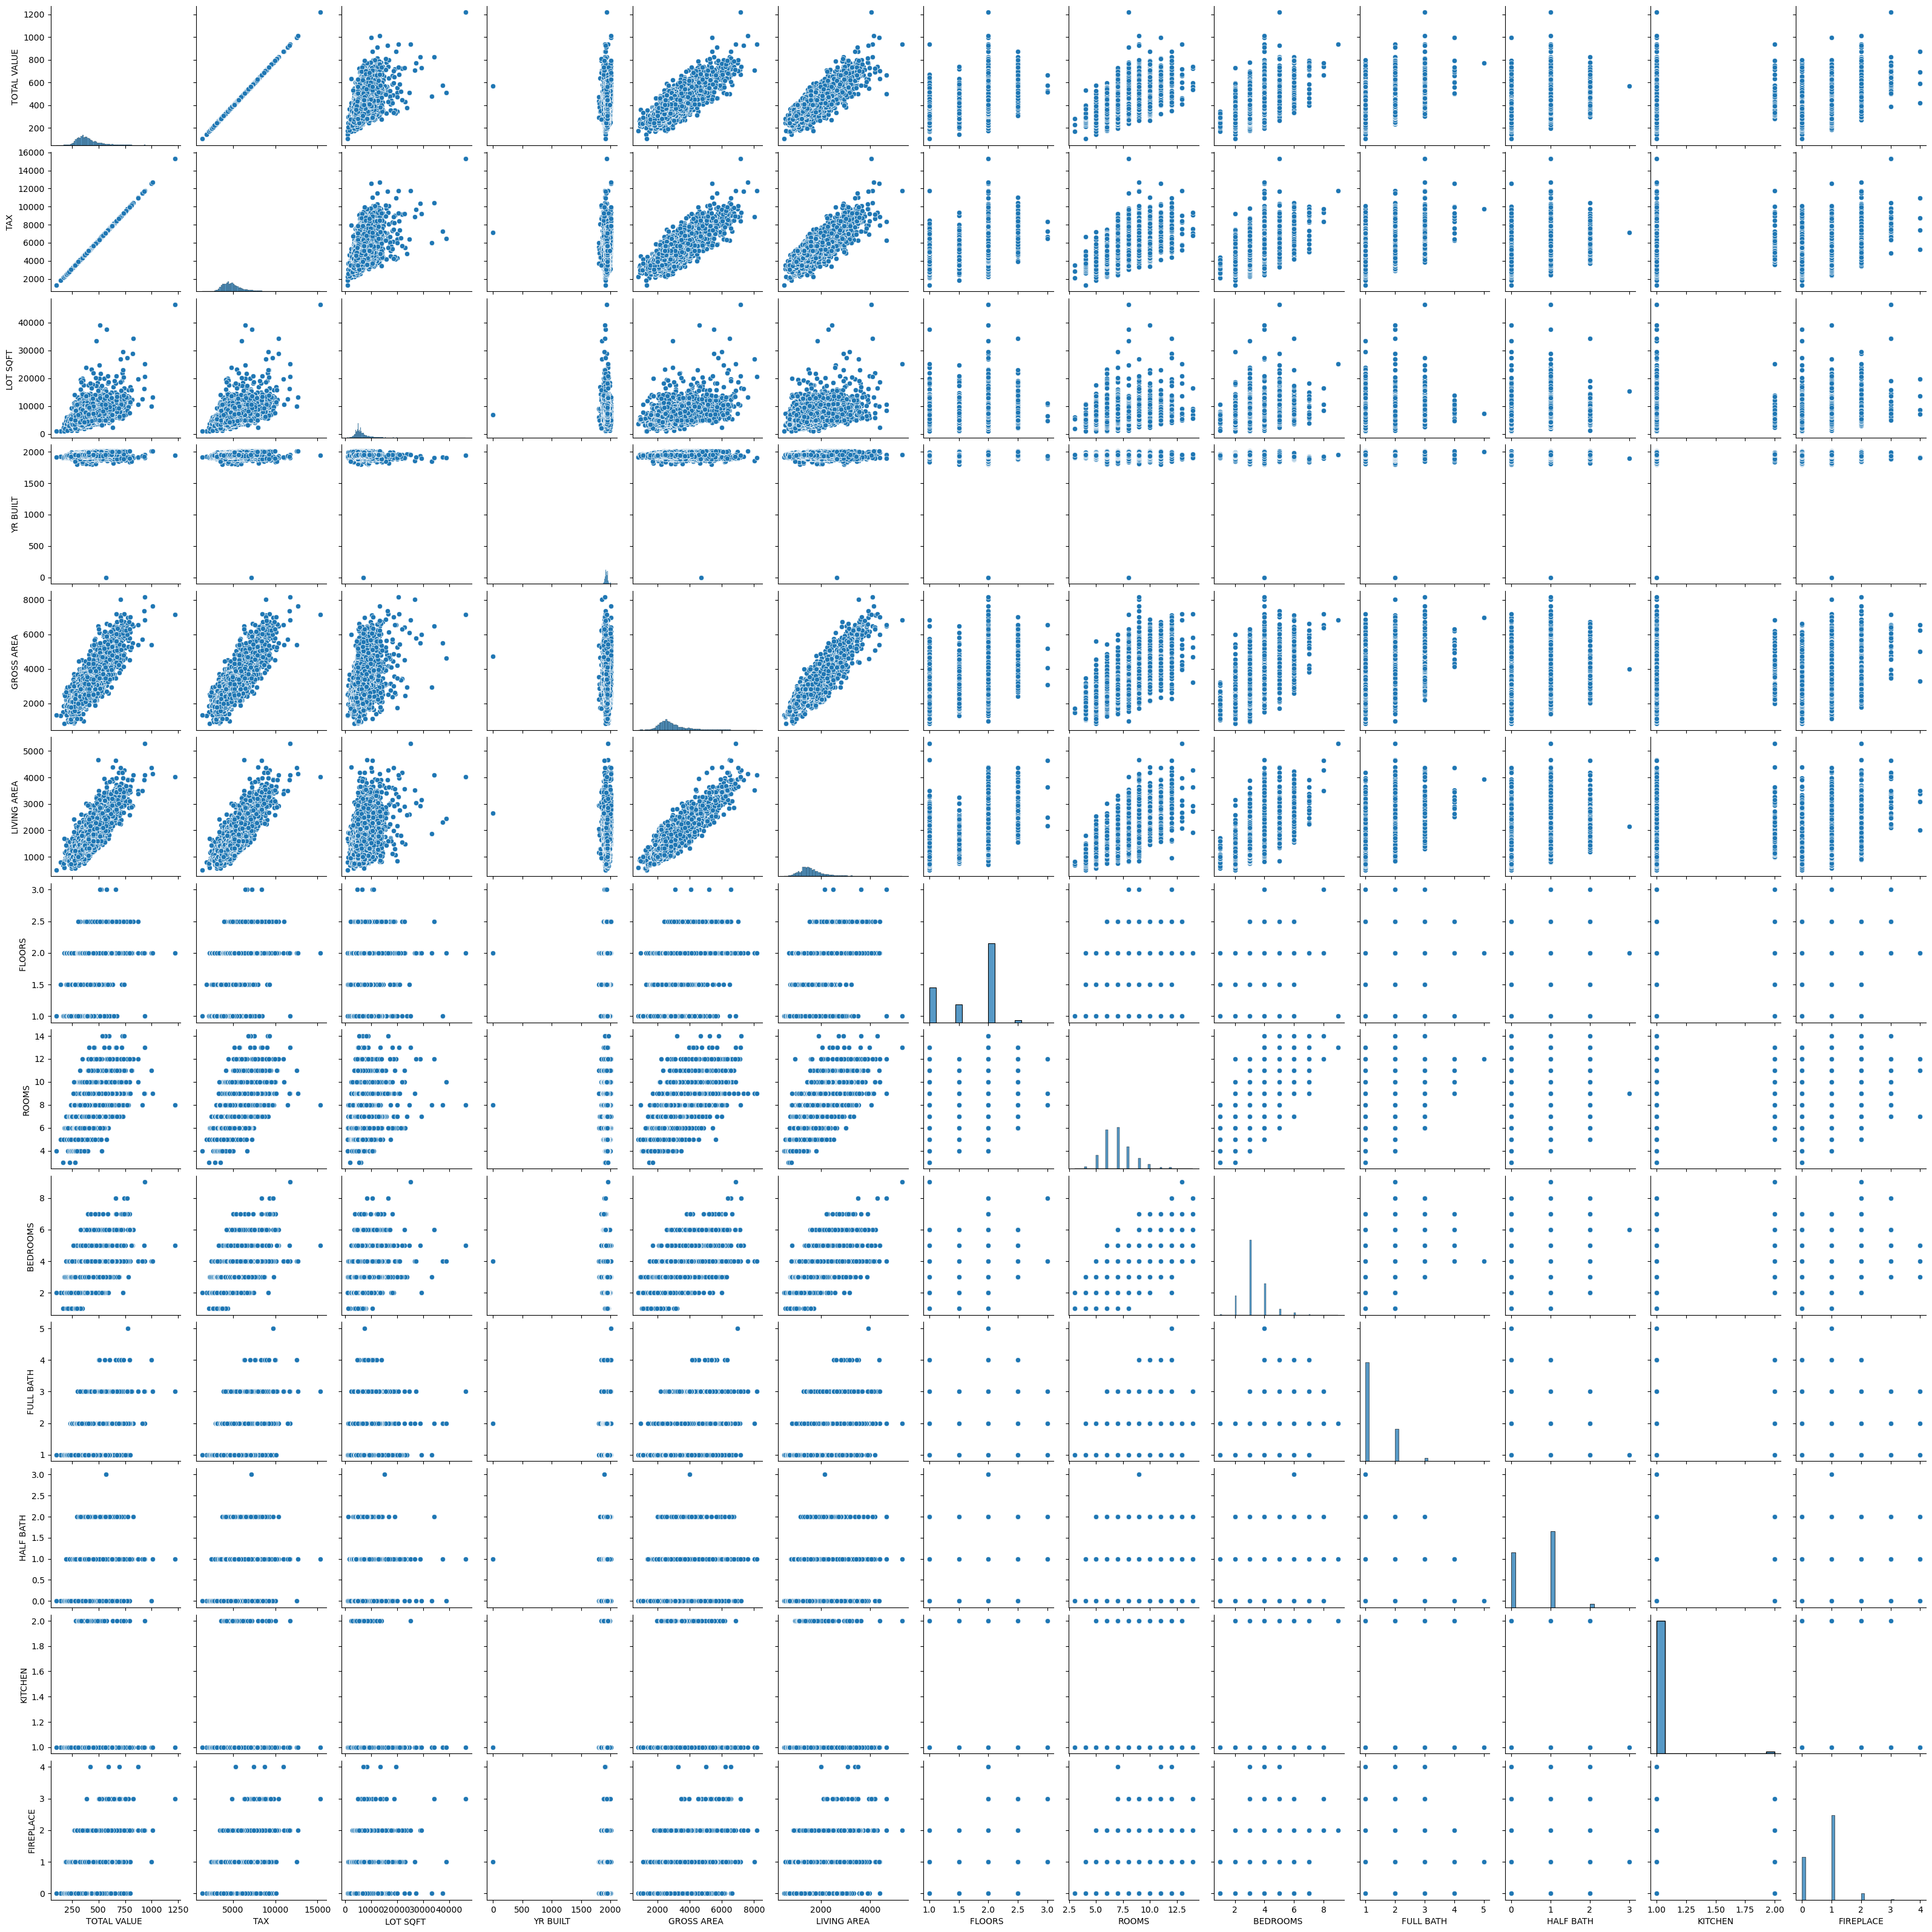

In [244]:
sns.pairplot(df.iloc[:,:-1])

In [245]:
df.drop("REMODEL", axis = 1).corr()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
TOTAL VALUE,1.000000,1.000000,0.546123,-0.100917,0.800519,0.837120,0.481523,0.638539,0.561871,0.432807,0.348167,0.018265,0.358567
TAX,1.000000,1.000000,0.546120,-0.100918,0.800518,0.837122,0.481524,0.638542,0.561872,0.432806,0.348165,0.018261,0.358566
LOT SQFT,0.546123,0.546120,1.000000,-0.068908,0.448880,0.426045,0.073662,0.308395,0.254106,0.201317,0.134996,0.044525,0.181879
YR BUILT,-0.100917,-0.100918,-0.068908,1.000000,-0.167928,-0.131274,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234
GROSS AREA,0.800519,0.800518,0.448880,-0.167928,1.000000,0.899775,0.300666,0.651501,0.571791,0.419734,0.226683,0.030501,0.270080
LIVING AREA,0.837120,0.837122,0.426045,-0.131274,0.899775,1.000000,0.475824,0.720671,0.641041,0.437987,0.301098,0.082825,0.262159
FLOORS,0.481523,0.481524,0.073662,-0.190453,0.300666,0.475824,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506
ROOMS,0.638539,0.638542,0.308395,-0.144686,0.651501,0.720671,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223
BEDROOMS,0.561871,0.561872,0.254106,-0.130411,0.571791,0.641041,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380
FULL BATH,0.432807,0.432806,0.201317,0.073706,0.419734,0.437987,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160


## Feature Engineering

In [246]:
df2 = df.drop("TAX", axis = 1) #highly correlated 

In [247]:
df2 = df2.drop("REMODEL", axis = 1) #qualatative and has missing values

## Build a linear regression model 
Removed "TAX" and "REMODEL" columns

In [248]:
df2.columns

Index(['TOTAL VALUE ', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA',
       'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN',
       'FIREPLACE'],
      dtype='object')

In [249]:
model = LinearRegression()

In [250]:
preds = ['LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN', 'FIREPLACE']

In [251]:
x = df2[preds]
y = df2['TOTAL VALUE ']

In [252]:
model.fit(x,y)

LinearRegression()

In [253]:
y_pred = model.predict(x)

In [254]:
r2 = r2_score(y, y_pred)
r2

0.8060414048780906

R2= 0.8060414048780906


<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lizgi\AppData\Local\Temp\ipykernel_254148\3548725965.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat y$ predicted')


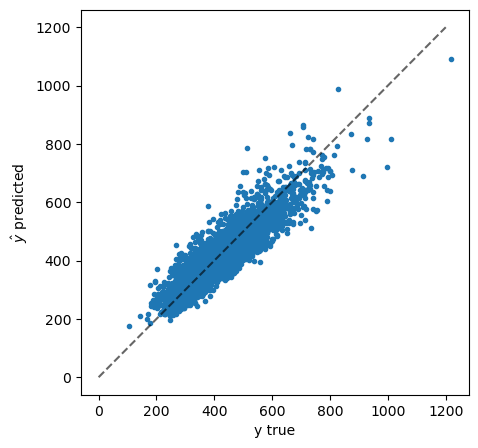

In [255]:
print('R2=', r2_score(y, y_pred))

plt.figure(figsize=(5,5))
plt.plot(y, y_pred, '.')
plt.xlabel('y true')
plt.ylabel('$\hat y$ predicted')
plt.plot([0,1200],[0,1200], 'k--', alpha=0.6)

## Feature Engineering: One-Hot-Encode

Adding back "REMODEL" column


In [256]:
pd.get_dummies(df)

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL_Old,REMODEL_Recent
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,False,False
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,False,True
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,False,False
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,False,False
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,5092,6762,1938,2594,1714,2.0,9,3,2,1,1,1,False,True
5798,407.9,5131,9408,1950,2414,1333,2.0,6,3,1,1,1,1,False,False
5799,406.5,5113,7198,1987,2480,1674,2.0,7,3,1,1,1,1,False,False
5800,308.7,3883,6890,1946,2000,1000,1.0,5,2,1,0,1,0,False,False


In [257]:
dfRemodel = pd.concat([df, pd.get_dummies(df['REMODEL'])], axis=1)
dfRemodel.drop('REMODEL', axis = 1, inplace = True)
dfRemodel.drop("TAX", axis = 1, inplace = True)
dfRemodel 

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,Old,Recent
0,344.2,9965,1880,2436,1352,2.0,6,3,1,1,1,0,False,False
1,412.6,6590,1945,3108,1976,2.0,10,4,2,1,1,0,False,True
2,330.1,7500,1890,2294,1371,2.0,8,4,1,1,1,0,False,False
3,498.6,13773,1957,5032,2608,1.0,9,5,1,1,1,1,False,False
4,331.5,5000,1910,2370,1438,2.0,7,3,2,0,1,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,404.8,6762,1938,2594,1714,2.0,9,3,2,1,1,1,False,True
5798,407.9,9408,1950,2414,1333,2.0,6,3,1,1,1,1,False,False
5799,406.5,7198,1987,2480,1674,2.0,7,3,1,1,1,1,False,False
5800,308.7,6890,1946,2000,1000,1.0,5,2,1,0,1,0,False,False


In [285]:
dfRemodel.corr()

,TOTAL VALUE,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,Old,Recent
TOTAL VALUE,1.000000,0.546123,-0.100917,0.800519,0.837120,0.481523,0.638539,0.561871,0.432807,0.348167,0.018265,0.358567,0.041721,0.228764
LOT SQFT,0.546123,1.000000,-0.068908,0.448880,0.426045,0.073662,0.308395,0.254106,0.201317,0.134996,0.044525,0.181879,0.022750,0.038864
YR BUILT,-0.100917,-0.068908,1.000000,-0.167928,-0.131274,-0.190453,-0.144686,-0.130411,0.073706,0.060685,0.052091,0.087234,-0.064071,-0.101228
GROSS AREA,0.800519,0.448880,-0.167928,1.000000,0.899775,0.300666,0.651501,0.571791,0.419734,0.226683,0.030501,0.270080,0.056777,0.150675
LIVING AREA,0.837120,0.426045,-0.131274,0.899775,1.000000,0.475824,0.720671,0.641041,0.437987,0.301098,0.082825,0.262159,0.045734,0.168642
FLOORS,0.481523,0.073662,-0.190453,0.300666,0.475824,1.000000,0.432856,0.431242,0.112166,0.316142,-0.114602,0.120506,0.048083,0.095531
ROOMS,0.638539,0.308395,-0.144686,0.651501,0.720671,0.432856,1.000000,0.710693,0.378274,0.282655,0.129223,0.205223,0.050327,0.139214
BEDROOMS,0.561871,0.254106,-0.130411,0.571791,0.641041,0.431242,0.710693,1.000000,0.332620,0.256852,0.085353,0.164380,0.042266,0.121563
FULL BATH,0.432807,0.201317,0.073706,0.419734,0.437987,0.112166,0.378274,0.332620,1.000000,-0.130628,0.146650,0.140160,0.023718,0.206033
HALF BATH,0.348167,0.134996,0.060685,0.226683,0.301098,0.316142,0.282655,0.256852,-0.130628,1.000000,-0.020071,0.176234,-0.009348,0.021487


In [258]:
dfRemodel.columns

Index(['TOTAL VALUE ', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA',
       'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN',
       'FIREPLACE', 'Old', 'Recent'],
      dtype='object')

In [259]:
Remodel_preds = ['LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA',
       'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN',
       'FIREPLACE','Old', 'Recent']

In [260]:
xRemodel = dfRemodel[Remodel_preds]
yRemodel = dfRemodel["TOTAL VALUE "]

In [261]:
Remodel = linear_model.LinearRegression()

In [262]:
Remodel.fit(xRemodel, yRemodel)

LinearRegression()

In [263]:
yRemodel_pred = Remodel.predict(xRemodel)

In [264]:
Remodelr2 = r2_score(yRemodel, yRemodel_pred)
Remodelr2

0.8135276096013705

R2= 0.8135276096013705


<>:6: SyntaxWarning: invalid escape sequence '\h'
<>:6: SyntaxWarning: invalid escape sequence '\h'
C:\Users\lizgi\AppData\Local\Temp\ipykernel_254148\2197571614.py:6: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat y$ predicted')


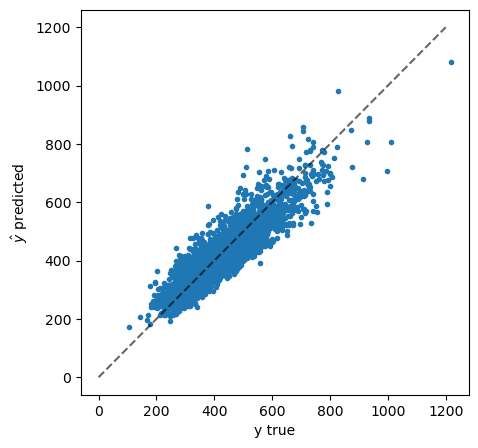

In [265]:
print('R2=', r2_score(yRemodel, yRemodel_pred))

plt.figure(figsize=(5,5))
plt.plot(yRemodel, yRemodel_pred, '.')
plt.xlabel('y true')
plt.ylabel('$\hat y$ predicted')
plt.plot([0,1200],[0,1200], 'k--', alpha=0.6)

In [266]:
print(r2 - Remodelr2)

-0.007486204723279877


With "Remodel" dummies the r2 score is slightly better

## Predicting

In [267]:
df0 = pd.read_csv("WRpredict.csv")
df0

,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,9600,1896,3356,2078,2.0,7,3,2,1,1,0,Old
1,5115,1930,3183,1858,2.0,7,4,1,1,1,0,NaN
2,4717,1910,2592,1572,2.0,7,3,1,1,1,0,NaN
3,7210,1950,3104,1395,1.0,6,3,1,1,1,1,NaN
4,2947,1991,1800,1800,2.0,6,3,1,1,1,1,NaN


In [268]:
df0.columns

Index(['LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA', 'FLOORS ',
       'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN', 'FIREPLACE',
       'REMODEL'],
      dtype='object')

In [269]:
df0 = pd.concat([df0, pd.get_dummies(df0['REMODEL'])], axis=1)
df0.drop('REMODEL', axis = 1, inplace = True)
df0

,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,Old
0,9600,1896,3356,2078,2.0,7,3,2,1,1,0,True
1,5115,1930,3183,1858,2.0,7,4,1,1,1,0,False
2,4717,1910,2592,1572,2.0,7,3,1,1,1,0,False
3,7210,1950,3104,1395,1.0,6,3,1,1,1,1,False
4,2947,1991,1800,1800,2.0,6,3,1,1,1,1,False


In [270]:
df0.insert(12, "Recent", [False, False, False, False, False], True)
df0

,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,Old,Recent
0,9600,1896,3356,2078,2.0,7,3,2,1,1,0,True,False
1,5115,1930,3183,1858,2.0,7,4,1,1,1,0,False,False
2,4717,1910,2592,1572,2.0,7,3,1,1,1,0,False,False
3,7210,1950,3104,1395,1.0,6,3,1,1,1,1,False,False
4,2947,1991,1800,1800,2.0,6,3,1,1,1,1,False,False


In [271]:
df0.columns

Index(['LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA', 'FLOORS ',
       'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN', 'FIREPLACE',
       'Old', 'Recent'],
      dtype='object')

In [272]:
PrePreds = ['LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA', 'FLOORS ',
       'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN', 'FIREPLACE',
       'Old', 'Recent']

In [273]:
xPred = df0[PrePreds]

In [274]:
yPre_pred = Remodel.predict(xPred)

In [275]:
yPre_pred

array([474.29317473, 396.14988084, 359.33377802, 367.72580806,
       354.02273143])

In [276]:
Predictions = pd.DataFrame(yPre_pred)
Predictions.rename(columns = {0: "Price"}, inplace = True)
Predictions

,Price
0,474.293175
1,396.149881
2,359.333778
3,367.725808
4,354.022731


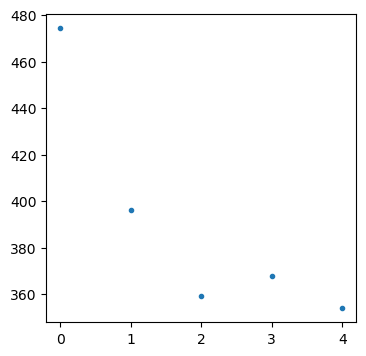

In [277]:
plt.figure(figsize=(4,4))
plt.plot(yPre_pred, '.')

## Messing Around

In [278]:
dfRemodel.columns

Index(['TOTAL VALUE ', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ', 'LIVING AREA',
       'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH', 'HALF BATH', 'KITCHEN',
       'FIREPLACE', 'Old', 'Recent'],
      dtype='object')

In [279]:
Xpreds = ['GROSS AREA ', 'LIVING AREA']

In [280]:
Xmess = dfRemodel[Xpreds]
Ymess = dfRemodel['TOTAL VALUE ']

In [281]:
Messy = LinearRegression()

In [282]:
Messy.fit(Xmess, Ymess)

LinearRegression()

In [283]:
Ymess_preds = Messy.predict(Xmess)

In [284]:
r2_score(Ymess, Ymess_preds)

0.7125201808296022

Worse!